In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
df = pd.read_csv('C:\\Users\\monam\\OneDrive\\Desktop\\testtC2.csv')

# Compute composite scores for groups of Likert-scale responses
attitude_questions = ['IMP_1', 'IMP_2', 'EXP_1', 'EXP_2']
norms_questions = ['RES_1', 'RES_2', 'RES_3', 'RES_4']
emotions_questions = ['AFC_1', 'AFC_2']
habits_questions = ['TH_1', 'TH_2', 'TH_3']
knowledge_questions = ['COPK_1', 'COPK_2', 'COPK_3', 'CLK_1', 'CLK_2', 'CLK_3']
information_questions = ['INF_1', 'INF_2', 'INF_3', 'INF_4']

df['attitude_score'] = df[attitude_questions].mean(axis=1)
df['norms_score'] = df[norms_questions].mean(axis=1)
df['emotions_score'] = df[emotions_questions].mean(axis=1)
df['habits_score'] = df[habits_questions].mean(axis=1)
df['knowledge_score'] = df[knowledge_questions].mean(axis=1)
df['information_score'] = df[information_questions].mean(axis=1)

# One-Hot Encoding categorical variables
encoder = OneHotEncoder(drop='first')
categorical_columns = ['AGE', 'GEN', 'DIS', 'CWS', 'HHI']
df_encoded = encoder.fit_transform(df[categorical_columns]).toarray()
encoded_feature_names = encoder.get_feature_names_out(categorical_columns)
df_encoded = pd.DataFrame(df_encoded, columns=encoded_feature_names, index=df.index)

# Combine the new one-hot encoded categorical features with the original dataframe
df = pd.concat([df, df_encoded], axis=1)

# Drop the original categorical columns and the columns used for composite scores as they are now redundant
df.drop(categorical_columns + attitude_questions + norms_questions + emotions_questions + habits_questions + knowledge_questions + information_questions, axis=1, inplace=True)

# Split the dataset into features and target variable
X = df.drop('C2', axis=1)  # Features
y = df['C2']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# The dataset is now ready for model training and evaluation.

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print out the metrics
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Feature Importances
feature_importances = pd.DataFrame(rf_classifier.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print('Feature Importances:')
print(feature_importances)

Accuracy: 0.5761904761904761
Confusion Matrix:
[[100   2   6]
 [ 24   3   5]
 [ 50   2  18]]
Classification Report:
              precision    recall  f1-score   support

           1       0.57      0.93      0.71       108
           2       0.43      0.09      0.15        32
           3       0.62      0.26      0.36        70

    accuracy                           0.58       210
   macro avg       0.54      0.43      0.41       210
weighted avg       0.57      0.58      0.51       210

Feature Importances:
                   importance
FOOBE_9              0.067060
attitude_score       0.059365
knowledge_score      0.055504
norms_score          0.050763
information_score    0.046387
habits_score         0.045429
emotions_score       0.037696
EDU                  0.035657
NEP_1                0.034933
FOOBE_4              0.032102
FOOBE_5              0.031090
NEP_2                0.030751
SN_1                 0.030726
SN_2                 0.030180
SC_1                 0.030169
FA

In [3]:
df = pd.read_csv('C:\\Users\\monam\\OneDrive\\Desktop\\testtC2.csv')

In [4]:
# Assuming 'df' is your DataFrame with the previously computed scores

# Drop individual components of the computed scores to prevent potential multicollinearity
components_to_drop = ['IMP_1', 'IMP_2', 'EXP_1', 'EXP_2', 'RES_1', 'RES_2', 'RES_3', 'RES_4',
                      'AFC_1', 'AFC_2', 'TH_1', 'TH_2', 'TH_3', 'COPK_1', 'COPK_2', 'COPK_3',
                      'CLK_1', 'CLK_2', 'CLK_3', 'INF_1', 'INF_2', 'INF_3', 'INF_4']
df.drop(columns=components_to_drop, inplace=True)

# The dataset now contains aggregate scores and other features not included in the scores
# You can proceed with splitting the data and training the model

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame after preprocessing

# Split the dataset into features (X) and target variable (y)
X = df.drop('C2', axis=1)  # Drop the column with the target variable to create the features set
y = df['C2']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print out the metrics
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Feature Importances
feature_importances = pd.DataFrame(rf_classifier.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print('Feature Importances:')
print(feature_importances)

Accuracy: 0.5428571428571428
Confusion Matrix:
[[94  4 10]
 [22  3  7]
 [49  4 17]]
Classification Report:
              precision    recall  f1-score   support

           1       0.57      0.87      0.69       108
           2       0.27      0.09      0.14        32
           3       0.50      0.24      0.33        70

    accuracy                           0.54       210
   macro avg       0.45      0.40      0.39       210
weighted avg       0.50      0.54      0.48       210

Feature Importances:
         importance
FOOBE_9    0.088458
HHI        0.065877
CWS        0.056110
AGE        0.055967
FOOBE_4    0.053864
EDU        0.052718
NEP_1      0.050828
FOOBE_5    0.049688
NEP_2      0.049453
SC_1       0.049243
SN_1       0.046179
SR_1       0.045732
SR_2       0.044597
SN_2       0.043746
FAI_1      0.043008
NEP_3      0.042212
FOOBE_3    0.040871
FAI_2      0.040351
FOOBE_1    0.031763
DIS        0.026633
GEN        0.022701


In [6]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE()

# Fit SMOTE on the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Re-train the Random Forest classifier on the SMOTE-resampled training data
rf_classifier.fit(X_train_smote, y_train_smote)

# Make predictions on the test data
y_pred_smote = rf_classifier.predict(X_test)

# Evaluate the mode

In [7]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE()

# Fit SMOTE on the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Re-train the Random Forest classifier on the SMOTE-resampled training data
rf_classifier.fit(X_train_smote, y_train_smote)

# Make predictions on the test data
y_pred_smote = rf_classifier.predict(X_test)

# Evaluate the model's performance after SMOTE
accuracy_smote = accuracy_score(y_test, y_pred_smote)
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
class_report_smote = classification_report(y_test, y_pred_smote)

# Print out the metrics after SMOTE
print(f'Accuracy after SMOTE: {accuracy_smote}')
print('Confusion Matrix after SMOTE:')
print(conf_matrix_smote)
print('Classification Report after SMOTE:')
print(class_report_smote)

Accuracy after SMOTE: 0.5047619047619047
Confusion Matrix after SMOTE:
[[72 12 24]
 [17  5 10]
 [32  9 29]]
Classification Report after SMOTE:
              precision    recall  f1-score   support

           1       0.60      0.67      0.63       108
           2       0.19      0.16      0.17        32
           3       0.46      0.41      0.44        70

    accuracy                           0.50       210
   macro avg       0.42      0.41      0.41       210
weighted avg       0.49      0.50      0.50       210



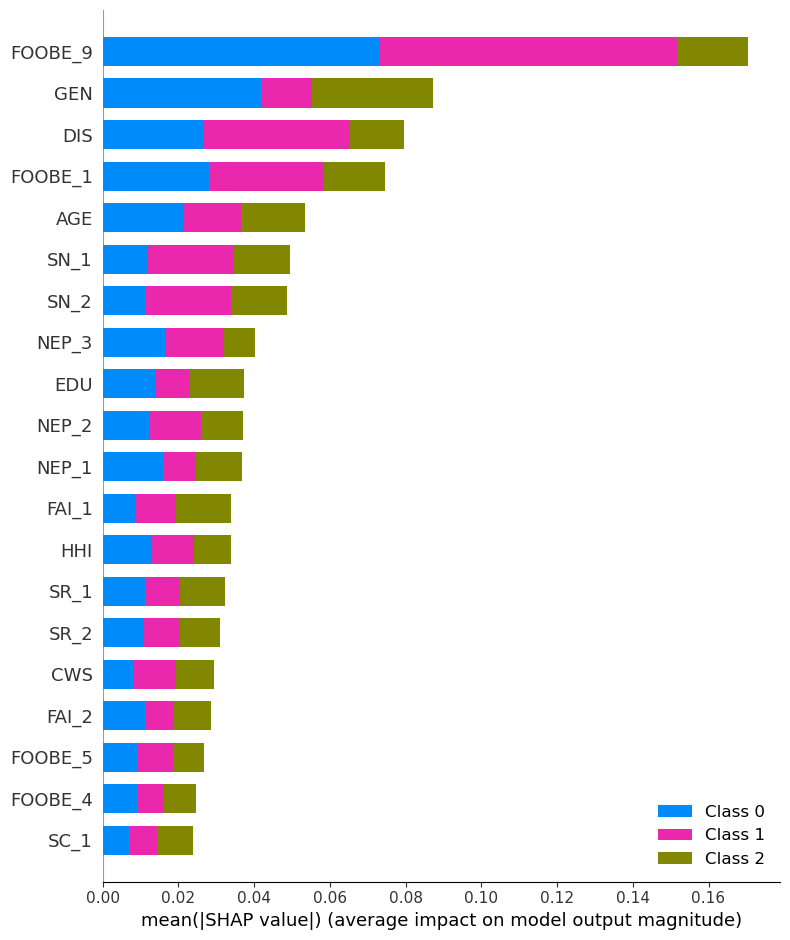

In [8]:
import shap

# Create a SHAP explainer object
explainer = shap.TreeExplainer(rf_classifier)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Summarize the SHAP values in a plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

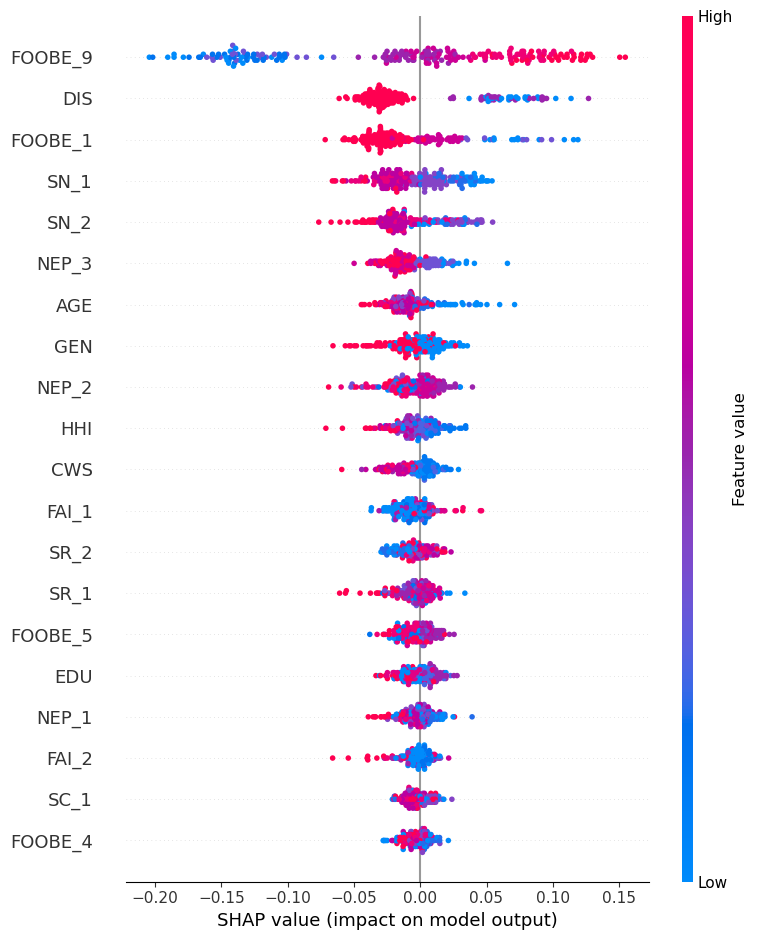

In [9]:
# For binary classification, you'd have shap_values[0] for class 0 and shap_values[1] for class 1.
# For multi-class classification, index corresponds to the class order.
class_index = 1  # Replace with the class of interest
shap.summary_plot(shap_values[class_index], X_test)

In [10]:
# Visualize the first prediction's explanation
shap.initjs()  # Initialize JavaScript in the notebook for SHAP plots
shap.force_plot(explainer.expected_value[class_index], shap_values[class_index][0,:], X_test.iloc[0,:])

In [1]:
import pandas as pd
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load your data
df = pd.read_csv('C:\\Users\\monam\\OneDrive\\Desktop\\testtC2.csv')

# Assuming `X` are your features and `y` is your target variable
X = df.drop('target', axis=1)  # Replace 'target' with your actual target column name
y = df['target']  # Replace 'target' with your actual target column name

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model (example: RandomForestClassifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Calculate SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Generate a dependence plot for a specific feature
# Replace 'feature_name' with the actual feature you want to examine
shap.dependence_plot('feature_name', shap_values[1], X_test)

KeyError: "['target'] not found in axis"

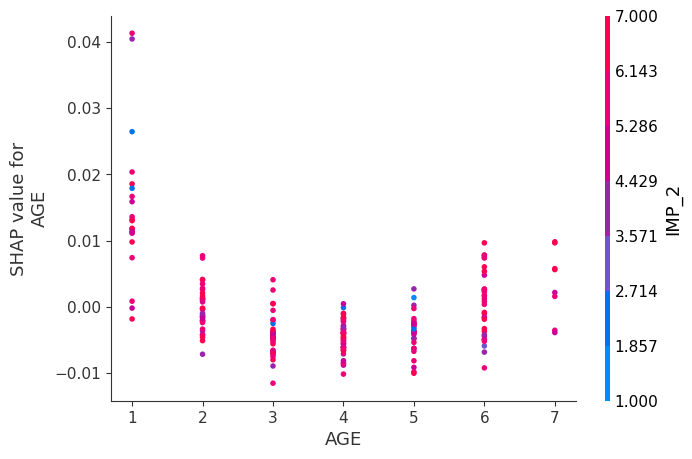

In [2]:
import pandas as pd
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load your data
df = pd.read_csv('C:\\Users\\monam\\OneDrive\\Desktop\\testtC2.csv')

# Assuming `X` are your features and `y` is your target variable
X = df.drop('C2', axis=1)  # Replace 'target' with your actual target column name
y = df['C2']  # Replace 'target' with your actual target column name

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model (example: RandomForestClassifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Calculate SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Generate a dependence plot for a specific feature
# Replace 'feature_name' with the actual feature you want to examine
shap.dependence_plot('AGE', shap_values[1], X_test)

In [3]:
!pip install treeinterpreter

In [4]:
from treeinterpreter import treeinterpreter as ti
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

# Assume X_train, X_test, y_train, y_test are already defined and the RandomForestClassifier is trained

# We will use the RandomForestClassifier as an example
model = RandomForestClassifier()
model.fit(X_train, y_train)

# For a given instance (for example the first row of the test set)
instance = X_test.iloc[0].values.reshape(1, -1)

# Now we can make predictions and decompose the prediction
prediction, bias, contributions = ti.predict(model, instance)

# The prediction is the sum of bias and contributions
print(f"Prediction: {prediction}")
print(f"Bias (baseline prediction): {bias}")
print(f"Contributions by features: {contributions}")

Prediction: [[0.33 0.14 0.53]]
Bias (baseline prediction): [[0.52955952 0.1622619  0.30817857]]
Contributions by features: [[[ 1.87138304e-03 -4.38085996e-03  2.50947692e-03]
  [-1.41098940e-02 -2.30022206e-04  1.43399162e-02]
  [-1.43458400e-02  4.67101160e-03  9.67482844e-03]
  [-5.55707246e-03  9.38286263e-03 -3.82579016e-03]
  [-1.39991433e-02 -8.31329378e-03  2.23124371e-02]
  [-2.24110413e-03 -4.22644531e-03  6.46754944e-03]
  [-1.58124436e-03  4.92839317e-03 -3.34714881e-03]
  [ 4.94976729e-03 -3.29011490e-03 -1.65965239e-03]
  [-1.68070664e-02 -9.97915592e-03  2.67862223e-02]
  [ 3.04734934e-03 -7.67515957e-04 -2.27983338e-03]
  [ 1.79110337e-02  5.24144601e-04 -1.84351783e-02]
  [-1.58960702e-02 -3.02171395e-03  1.89177841e-02]
  [-9.35549545e-02  3.19013528e-02  6.16536017e-02]
  [-4.77058152e-03 -1.96581978e-03  6.73640130e-03]
  [ 1.06364291e-02 -1.11089156e-03 -9.52553753e-03]
  [ 6.77030801e-03 -7.27637912e-03  5.06071109e-04]
  [ 3.06144197e-03  2.97392845e-03 -6.0353704

In [5]:
from treeinterpreter import treeinterpreter as ti

# Assuming you have a trained model and a dataset X_test
prediction, bias, contributions = ti.predict(model, X_test)

# Aggregate the contributions
# The contributions for each feature across all instances can be summed along the axis 0 (across all rows)
feature_contributions = contributions.sum(axis=0)

# Now you have the aggregate contribution of each feature
print("Feature contributions:")
for i in range(len(X_test.columns)):
    print(f"{X_test.columns[i]}: {feature_contributions[i]}")

X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but Dec

Feature contributions:
EXP_1: [-0.1308522   0.06695689  0.06389532]
EXP_2: [-0.59063638 -0.27124713  0.86188352]
IMP_1: [-0.24335738  0.19644907  0.04690831]
IMP_2: [-0.44971562 -0.21136822  0.66108384]
RES_1: [-0.05984445 -0.13659645  0.1964409 ]
RES_2: [ 0.31920091 -0.06445809 -0.25474282]
RES_3: [ 0.00152588  0.06558087 -0.06710674]
RES_4: [ 0.01055998 -0.00190737 -0.00865261]
FOOBE_1: [-0.00306855 -0.06339267  0.06646122]
FOOBE_3: [-0.27938699  0.09512686  0.18426013]
FOOBE_4: [-0.23222136  0.1591394   0.07308197]
FOOBE_5: [-0.36911504  0.22621067  0.14290437]
FOOBE_9: [ 0.22978862 -0.5657936   0.33600498]
NEP_1: [ 0.23862472 -0.05034691 -0.18827781]
NEP_2: [-0.09769074  0.02121506  0.07647568]
NEP_3: [ 0.25763294 -0.23609083 -0.0215421 ]
SN_1: [ 0.22897263  0.00743228 -0.23640491]
SN_2: [ 0.14233576 -0.16600748  0.02367173]
FAI_1: [-0.05665969 -0.20051071  0.2571704 ]
FAI_2: [-0.220447    0.09553651  0.12491049]
SR_1: [-0.11326767  0.1179603  -0.00469263]
SR_2: [-0.30005957  0.228

X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but Dec